# NLP With Hotel Review Part 2

By: Krzysztof Rafalont

In [87]:
# Please run the imports below in order to set up the environment first.

# The usual packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

import seaborn as sns
from scipy import stats
import statsmodels.api as sm

# To make our sets
from sklearn.model_selection import train_test_split 

# Scalars
from sklearn.preprocessing import StandardScaler, MinMaxScaler 

# The classifiers 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectKBest
from sklearn.utils import resample
from sklearn.model_selection import cross_val_score

import time

# Filter warnings
import warnings
warnings.filterwarnings('ignore')

Welcome to the NLP with Hotel Review Part 2. Here we will dive into the Exploratory Data Analysts as well as Data Wrangling of the Hotel Review dataset. Please conotinue by running all of the cells below accordingly. First by reading in all of the appropriate datasets.

In [2]:
# Please run the code below to read in the following CSV data files.

# Contains clean Train and Test data for various Hotel Reviews and other Hotel information.
hotelreviews_train_df = pd.read_csv('data/clean_train_dataframe.csv')
hotelreviews_test_df = pd.read_csv('data/clean_test_dataframe.csv')

Before we begin, let us take a look at the Train and Test Hotel Review datasets that we will be working with:

In [3]:
# To take a peak at the Train data we are working with.
hotelreviews_train_df.head()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,weekday_of_review,...,n_worry,n_worth,n_would,n_write,n_wrong,n_year,n_yes,n_yet,n_young,rating
0,620,9.0,0,1974,164,1,562,51.506558,-0.004514,1,...,0,0,0,0,0,0,0,0,0,1
1,1258,9.4,6,4204,4,5,276,51.502435,-0.000250,0,...,0,0,0,0,0,0,0,0,0,1
2,995,8.1,2,3826,38,1,129,51.504348,-0.033444,0,...,0,0,0,0,0,0,0,0,0,1
3,853,8.4,7,2726,10,10,164,51.507377,0.038657,0,...,0,0,0,0,0,0,0,0,0,0
4,1243,8.1,11,6608,8,69,639,51.513556,-0.180002,1,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# To take a peak at the Test data we are working with.
hotelreviews_test_df.head()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,weekday_of_review,...,n_n_worry,n_n_worth,n_n_would,n_n_write,n_n_wrong,n_n_year,n_n_yes,n_n_yet,n_n_young,rating
0,1005,8.3,0,3469,6,2,297,51.559096,-0.284704,0,...,0,0,0,0,0,0,0,0,0,0
1,487,8.8,46,1805,121,1,4,51.474469,-0.019428,6,...,0,0,0,0,0,0,0,0,0,1
2,570,9.3,0,2319,9,1,590,51.505696,-0.101525,1,...,0,0,0,0,0,0,0,0,0,1
3,2623,8.7,19,12158,0,2,269,51.500961,-0.116591,0,...,0,0,0,0,0,0,0,0,0,0
4,365,8.1,13,1567,0,2,373,51.515125,-0.160066,1,...,0,0,0,0,0,0,0,0,0,0


As we can see in the peak that we took into the train and test data above, we can see that we have much more information now (2744 columns now) and that our dataset is neatly organized and cleaned. Let us dive a little deeper into our datasets to understand what exactly they are comprised of. Let us start by looking at the Train data:

In [5]:
# To get further insights into the dataset.
hotelreviews_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12798 entries, 0 to 12797
Columns: 2744 entries, Additional_Number_of_Scoring to rating
dtypes: float64(3), int64(2741)
memory usage: 267.9 MB


In [6]:
# To see the shape of the dataset.
hotelreviews_train_df.shape

(12798, 2744)

In [7]:
# Checking for any missing values.
np.where(hotelreviews_train_df.isnull().sum() > 0)

(array([], dtype=int64),)

In [8]:
# Checking for any duplicated values.
np.where(hotelreviews_train_df.duplicated() == True)

(array([], dtype=int64),)

Our train dataset is comprised of 12,798 rows and 2744 columns. It is comprised of 2 different numeric datatypes: 3 float64 columns and 2741 int64 columns. We can also see that our data is nice and clean as it does not contain any missing values and no duplicated information.

Let us now look at the Test data:

In [9]:
# To get further insights into the dataset.
hotelreviews_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4267 entries, 0 to 4266
Columns: 2744 entries, Additional_Number_of_Scoring to rating
dtypes: float64(3), int64(2741)
memory usage: 89.3 MB


In [10]:
# To see the shape of the dataset.
hotelreviews_test_df.shape

(4267, 2744)

In [11]:
# Checking for any missing values.
np.where(hotelreviews_test_df.isnull().sum() > 0)

(array([], dtype=int64),)

In [12]:
# Checking for any duplicated values.
np.where(hotelreviews_test_df.duplicated() == True)

(array([], dtype=int64),)

Our test dataset is comprised of 4,267 rows and 2744 columns. It is also comprised of 2 different numeric datatypes: 3 float64 columns and 2741 int64 columns. We can also see that our data is nice and clean as it does not contain any missing values and no duplicated information. 

Based on this information we can also see that the train and test data is already split 75/25 (test_size = 0.25) for us, with our train dataset containing 75% of our data and the test dataset containing 25% of the data. Our next task is to identify and determine our independent features (X) and dependent variable (y) from our train and test datasets which would be assigned in the following way:

Train Dataset (hotelreviews_train_df)

- Independent Features: X_train = hotelreviews_train_df (including all columns EXCEPT for `rating`)
    
- Dependent Variable: y_train = hotelreviews_train_df (ONLY `rating` column)
    
Test Dataset (hotelreviews_test_df)

- Independent Features: X_test = hotelreviews_test_df (including all columns EXCEPT for `rating`)
    
- Dependent Variable: y_test = hotelreviews_test_df (ONLY `rating` column)

Now that we have taken a deeper look at our data and determined our plan of action, we can begin by modeling through employing the use of different classifiers.

In [13]:
# Splitting our train and test data into appropriate train and test sets.

# Split train data by independent features(X) and dependent variable (y).
X_train = hotelreviews_train_df.loc[:, hotelreviews_train_df.columns != 'rating']
y_train = hotelreviews_train_df['rating']

# Split test data by independent features(X) and dependent variable (y).
X_test = hotelreviews_test_df.loc[:, hotelreviews_test_df.columns != 'rating']
y_test = hotelreviews_test_df['rating']

Lets check to see if the data split correctly and if our independent features matrix, `X` contains 2,743 dimensions (nrows, ncols). While our dependent variable, `y` contains one dimension (nrows,).

In [14]:
# Check and see if we have split the data correctly.
X_train.head()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,weekday_of_review,...,n_world,n_worry,n_worth,n_would,n_write,n_wrong,n_year,n_yes,n_yet,n_young
0,620,9.0,0,1974,164,1,562,51.506558,-0.004514,1,...,0,0,0,0,0,0,0,0,0,0
1,1258,9.4,6,4204,4,5,276,51.502435,-0.000250,0,...,0,0,0,0,0,0,0,0,0,0
2,995,8.1,2,3826,38,1,129,51.504348,-0.033444,0,...,0,0,0,0,0,0,0,0,0,0
3,853,8.4,7,2726,10,10,164,51.507377,0.038657,0,...,0,0,0,0,0,0,0,0,0,0
4,1243,8.1,11,6608,8,69,639,51.513556,-0.180002,1,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# Check shape of data to confirm it has all dimensions.
X_train.shape

(12798, 2743)

In [16]:
# Check and see if we have split the data correctly.
y_train.head()

0    1
1    1
2    1
3    0
4    0
Name: rating, dtype: int64

In [17]:
# Check shape of data to confirm it has 1 dimension.
y_train.shape

(12798,)

In [18]:
# Check and see if we have split the data correctly.
X_test.head()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,weekday_of_review,...,n_n_world,n_n_worry,n_n_worth,n_n_would,n_n_write,n_n_wrong,n_n_year,n_n_yes,n_n_yet,n_n_young
0,1005,8.3,0,3469,6,2,297,51.559096,-0.284704,0,...,0,0,0,0,0,0,0,0,0,0
1,487,8.8,46,1805,121,1,4,51.474469,-0.019428,6,...,0,0,0,0,0,0,0,0,0,0
2,570,9.3,0,2319,9,1,590,51.505696,-0.101525,1,...,0,0,0,0,0,0,0,0,0,0
3,2623,8.7,19,12158,0,2,269,51.500961,-0.116591,0,...,0,0,0,0,0,0,0,0,0,0
4,365,8.1,13,1567,0,2,373,51.515125,-0.160066,1,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# Check shape of data to confirm it has all dimensions.
X_test.shape

(4267, 2743)

In [20]:
# Check and see if we have split the data correctly.
y_test.head()

0    0
1    1
2    1
3    0
4    0
Name: rating, dtype: int64

In [21]:
# Check shape of data to confirm it has 1 dimension.
y_test.shape

(4267,)

# Modeling

## 1. Employing Linear Classifier on Dataset

### A. Fitting a Logisitic Regression Model

Here we will fit a logisitic regression model to the Hotel Review data with the `solver` set to `lbfgs`. We will use the Standard Scaler model because we can generally get strong performance from the standard scaler in many cases. Its also likely that the standard scaler will work better for models which assume/prefer normal distributions, such as Linear/logistic regression.

In [22]:
# Instantiate the the scaler
my_standard_scaler = StandardScaler()

# Fit scaler
my_standard_scaler = my_standard_scaler.fit(X_train)

# Transform X_train
X_train_ss = my_standard_scaler.transform(X_train)

# Transform X_test
X_test_ss = my_standard_scaler.transform(X_test)

In [23]:
# Build a Logistic Regression model.

# Instantiate the model
my_log_ss = LogisticRegression(solver='lbfgs')

# Fit the model
my_log_ss = my_log_ss.fit(X_train_ss, y_train)

# Predict/Score
train_score_log_ss = my_log_ss.score(X_train_ss, y_train)
test_score_log_ss = my_log_ss.score(X_test_ss, y_test)

In [24]:
print(f'Standard Scaler train accuracy:  {train_score_log_ss:.5f}')
print(f'Standard Scaler test accuracy:  {test_score_log_ss:.5f}', '\n')

Standard Scaler train accuracy:  0.88608
Standard Scaler test accuracy:  0.73283 



As seen above, looking at the numbers for logistic model, we can see that the Standard Scaler we used, which normalises the data performed quite well. It resulted in a Train accuracy of 0.886 (88.6%) and Test accuracy of 0.732 (73.2%). This is because Logistic Regression has an underlying assumption/preference that the features follow normal distribution. The Standard Scaler we used has achieved this.

### B. Most Predictive Words

Next, if we wanted to find the 20 words most predictive of a good review from the positive review column and similarly find what the 20 words most predictive of a bad review are from the negative review column. We can sse the regression coefficients from our Lostitic Regression above in order to plot these values against their respective columns, giving us a beautiful visualization and predictive power of 20 of the most predictive words of a good review and 20 of the most predictive words of a bad review.

Lets begin by taking a look at our model coefficients using `.coef_`:

In [25]:
# Take a look at our model coefficients.
my_log_ss.coef_

array([[-0.02299381,  0.47988298,  0.28576287, ...,  0.12776649,
        -0.0201696 ,  0.01179218]])

We can take this coefficients array from our model to transpose and flatten it, take the features from our Train dataset, and put these into a dataframe. Given that in our clean datasets we can see features starting either `p_` or `n_` followed by a word, I am going to assume that features beginning with `p_` are an indication of words from the positive review column. Respectively, for features beginning with `n_`, I am going to assume that words beginning with `n_` are an indication of words from the negative review column.

In [26]:
# Get the feature coefficients highlighting top and bottom 20.
logit_coefs = pd.DataFrame({'features': X_train.columns, 'coefficients': my_log_ss.coef_.transpose().flatten()})
good_coef = logit_coefs[logit_coefs["features"].str.startswith('p_')]
bad_coef = logit_coefs[logit_coefs["features"].str.startswith('n_')]
good_coef = good_coef.sort_values('coefficients',ascending=False)
bad_coef = bad_coef.sort_values('coefficients',ascending=True)
logit_coefs_best = good_coef.head(20)
logit_coefs_worst = bad_coef.head(20)

Lets visualize this using the following:

Text(0, 0.5, 'Coefficient')

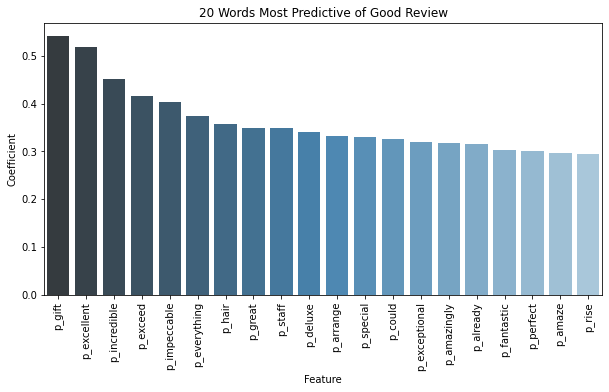

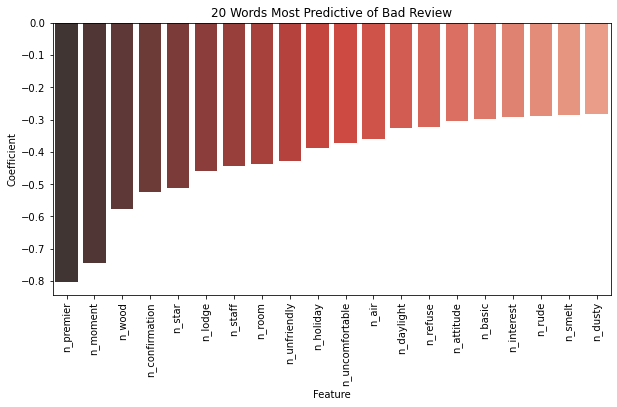

In [27]:
# Plot top 20 coefficients
plt.figure(figsize=(10,5))
best = sns.barplot(x='features', y='coefficients',data=logit_coefs_best, palette="Blues_d")
best.set_xticklabels(rotation=90, labels=logit_coefs_best.features)
plt.title('20 Words Most Predictive of Good Review')
plt.xlabel('Feature')
plt.ylabel('Coefficient')

# Plot bottom 20 coefficients
plt.figure(figsize=(10,5))
worst = sns.barplot(x='features', y='coefficients',data=logit_coefs_worst, palette="Reds_d")
worst.set_xticklabels(rotation=90, labels=logit_coefs_worst.features)
plt.title('20 Words Most Predictive of Bad Review')
plt.xlabel('Feature')
plt.ylabel('Coefficient')

The results from the above visualization appear to be very intuitive and easy to interpret. Words such as `gift`, `excellent`, and `incredible` are strong indicators of a positive review while words like `premier`, `moment`, and `wood` indicate a strong negative sentiment.

### C. Dimensionality Reduction

Next we will reduce the dimensionality of the dataset using PCA. This will help us gain a better understanding of what is the relationship between the number of dimensions and run-time for a logistic regression after comparing the two. Lets begin by taking a look again at our original Logistic Regression model.

Logistic Regression Model:

In [28]:
# Instantiate
logistic_regression_model = LogisticRegression(solver='lbfgs')

# Start a timer
start = time.time()

# Fit
logistic_regression_model.fit(X_train_ss, y_train)

# End timer
end =  time.time()

# Evaluate
print(f'The train accuracy is: {logistic_regression_model.score(X_train_ss,y_train):0.3f}')
print(f'The test accuracy is: {logistic_regression_model.score(X_test_ss,y_test):0.3f}')

# Display run-time in seconds
print("Run-Time: %s seconds" % (time.time() - start))

The train accuracy is: 0.886
The test accuracy is: 0.733
Run-Time: 2.6628124713897705 seconds


As expected, we can see that as previously we got a Train accuracy of 0.886 (88.6%) and Test accuracy of 0.733 (73.3%) which are good accuracies for our Logistic Regression. This time around we have also added a timer which shows us that our Logistic Regression model took approximately 2.64 seconds to compute.

PCA Model:

First we must fit our PCA model. Given that our entire dataset has 2,744 columns, we will reduce our dimensionality to only 20 PC's.

In [29]:
# Instantiate & fit PCA model.
my_pca = PCA(n_components=20)
my_pca.fit(X_train_ss)

# transform train data.
X_train_PCA = my_pca.transform(X_train_ss)

# Transform test data, with PCA fit on training data
X_test_PCA = my_pca.transform(X_test_ss)

In [30]:
print('Original number of features:', X_train_ss.shape[1])
print('Reduced number of features:', X_train_PCA.shape[1])

Original number of features: 2743
Reduced number of features: 20


Next we can evaluate our PCA Transformed, Lower-Dimensional Data.

In [31]:
# Instantiate
logistic_regression_model = LogisticRegression()

# Start a timer
start = time.time()

# Fit using PCA data
logistic_regression_model.fit(X_train_PCA, y_train)

# End timer
end =  time.time()

# Evaluate
print(f'The train accuracy is: {logistic_regression_model.score(X_train_PCA,y_train):0.3f}')
print(f'The test accuracy is: {logistic_regression_model.score(X_test_PCA,y_test):0.3f}')

# Display run-time in seconds
print("Run-Time: %s seconds" % (time.time() - start))

The train accuracy is: 0.771
The test accuracy is: 0.771
Run-Time: 0.019945859909057617 seconds


We can see that by using our PCA transformed data, we only got a Train accuracy of 0.768 (76.8%) and Test accuracy of 0.774 (77.4%) which are not a good indication in regards to accuracies as it indicates that our model may be overfit. This could be because we have reduced the amount of features within our dataset which in turn reduces the amount of data we are using for our modeling. The timer here shows us that our Logistic Regression model using lower dimenstionality took approximately 0.016 seconds to compute. 

What this tells us is that with regards to the relationship between the number of dimensions and run-time for a logistic regression, evidently the run-time would be much lower using PCA given that we are using much less data however this is at the cost of our models accuracy. The above helps illustrate the point that PCA isn't always an improvement, it can sometimes be helpful and computational efficient however as in our example it can sometimes hurt.

That being said, we can easily determine that the original logistic regression is the clear winner here!

To dive a little deeper, we can take a look at the total variance that each principal component explains using the `.explained_variance_ratio` attribute.

In [32]:
# Variance ratio for our 20 PC's.
expl_var = my_pca.explained_variance_ratio_
print(expl_var)

[0.00763786 0.0047272  0.00217979 0.00195909 0.00192238 0.00170136
 0.0016787  0.00163995 0.00160207 0.00156452 0.00152721 0.00151449
 0.00148735 0.00146049 0.00143345 0.00141229 0.00140156 0.00136778
 0.00135158 0.0013406 ]


We can then take these variance ratio for each of our 20 PC's and plot them to get a visual representation of the data.

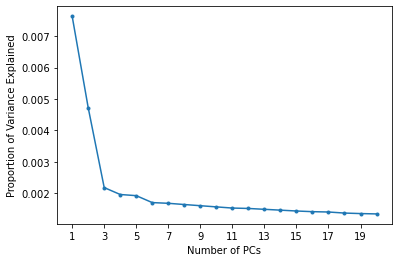

In [33]:
# Plot the explained variance ratios.
plt.figure()
plt.plot(range(1,21),expl_var,marker='.')
plt.xlabel('Number of PCs')
plt.ylabel('Proportion of Variance Explained')
plt.xticks(range(1,21,2))
plt.show()

Based on the plot above, we can identify the right amount of PC's that should be used as there is a sharp elbow in the plot. It seems like after 3 PCs, we are no longer adding much information by including more PCs. However as we will see in a moment, this can be very misleading.

In [34]:
# the first 3 PCs explain only 1.4% of the variance
my_pca.explained_variance_ratio_[:3].sum()

0.014544843365506878

The reason why our visualization may seem very misleading is because if we take a look at the sum of those 3 PC's we have identified, we see that they explain only 0.014 or 1.4% of the variance.

### D. Advantages and Disadvantages of Dimensionality Reduction

As seen in our previous analysis and modeling, using the full original features, we got a better Train/Test accuracy on our Logistic Regression model as opposed to the PCA model. This shouldn't be too surprising since PCA is essentially discarding information by compressing/projecting our data down into a lower dimensionality. An advantage and disadvantage of dimensionality reduction is:

Advantage:

- It is very efficient.

Disadvantage:

- Strongly focused in variance (sometimes there is not a direct relationship between variance and predictive power so it can discard useful information)

## 2. Employing K-Nearest Neighbour Classifier on Dataset

### A. Fitting a KNN Model

Before fitting out KNN model, we know that we have a large dataset with quite a high dimensionality. So, as per usual, we would first need to scale our data by employing the Standard Scaler to transform our data. Since we have already previously done this. We will proceed with using our Standard Scaled data `X_train_ss` and `X_test_ss`.

In [60]:
# Evaluate the model's accuracy.

# instantiate
my_knn = KNeighborsClassifier()

# Start a timer
start = time.time()

# fit
my_knn.fit(X_train_ss, y_train)

# End timer
end =  time.time()

# Predict & evaluate
train_accuracy = my_knn.score(X_train_ss, y_train)
test_accuracy = my_knn.score(X_test_ss, y_test)

# Print the accuracies
print('Train accuracy:', train_accuracy)
print('Test accuraccy:', test_accuracy)

# Display run-time in seconds
print("Run-Time: %s seconds" % (time.time() - start))

Train accuracy: 0.751211126738553
Test accuraccy: 0.6367471291305367
Run-Time: 728.5928757190704 seconds


Not only did that take a very long time to compute, with a run-time of approximately 728.59 seconds (or over 12 minutes!), but we can see that we have a Train accuracy of 0.751 (75.1%) and a Test accuracy of 0.636 (63.6%) which is are not the greatest accuracy scores.

### B. Reducing Number of Observations

As we had the privelege of experiencing, it is easy to determine that KNN is a computationally expensive model. We will now take a smaller sample of the dataset which would reduce the number of observations we have. For arguements sake, we will `train_test_split` our datasets using the `test_size` and set it to `0.3`. This will then allow us to compare the difference in accuracies and computation run-time between our original dataset and the smaller dataset with much less observations.

In [66]:
# Reduce dataset
X_train_rd, X_test_rd, y_train_rd, y_test_rd = train_test_split(X_train_ss, y_train, test_size = 0.3, stratify=y_train, random_state=1)

In [67]:
# Evaluate the model's accuracy on reduced number of observations in dataset.

# Instantiate
my_knn = KNeighborsClassifier()

# Start a timer
start = time.time()

# Fit
my_knn.fit(X_train_rd, y_train_rd)

# End timer
end =  time.time()

# Predict & Evaluate
train_accuracy = my_knn.score(X_train_rd, y_train_rd)
test_accuracy = my_knn.score(X_test_rd, y_test_rd)

# Print the accuracies
print('Train accuracy:', train_accuracy)
print('Test accuraccy:', test_accuracy)

# Display run-time in seconds
print("Run-Time: %s seconds" % (time.time() - start))

Train accuracy: 0.7475999106943514
Test accuraccy: 0.6395833333333333
Run-Time: 434.1228997707367 seconds


Unsurprisingly, our run-time has been almost halved with a run time of about 434.12 seconds (just over 7 min) compared to our original run-time of 728.59 seconds (or over 12 minutes). To add to this, there was also a slight change in our Test/Train accuracies, with a Train accuracy of 0.747 (74.7%) and a Test accuracy of 0.639 (63.9%). A decrease from our initial Train accuracy where we had a higher Train accuracy of 0.751 (75.1%) and a very minor increase in Test accuracy from our initial Test accuracy of 0.636 (63.6%).

When examining the relationship between the number of observations and the run-time for our KNN models, we can see that the less observations the lower the run time which would normally be expected given we are observing less data. However this in turn impacts our accuracy scores as we are using less observations, some of which could have been important/useful data.

### C. Advantage and Disadvantage of Reducing Number of Observations

The following is one advantage and one disadvantage of reducing the number of observations:

Advantage:

- We would be simplifying the model, making it more efficient and reducing run-time.

Disadvantage:

- In turn we could possibly be removing some very useful data.

This is very well reflected in our KNN models above.

### D. Use the dataset to find an optimal value for K in the KNN algorithm. You will need to split your dataset into train and validation sets.

Using the same dataset as above, we will now split our `X_train_rd` data (which we can consider as the 'remainder') again into an 80/20 split of Train and Validation. Meaning that we will take the that current Train and Test sets (70/30) and split our Train set (70%) and split it into Train set (80%) and Validation set (20%) while still having our Test Set (20%). This can also be shown as:

- (Train 80%) + (Validation 20%) = 100% (or our initial `X_train_rd` 80%) 
- (Test 20%)

Let's go ahead and put our plan into action. Then we will use the Train and Validation sets to find an optimal value for K in the KNN algorithm.

In [68]:
# Split Train and Validation sets
X_train_knn, X_validation_knn, y_train_knn, y_validation_knn = train_test_split(X_train_rd, y_train_rd, test_size = 0.2, stratify=y_train_rd, random_state=1)

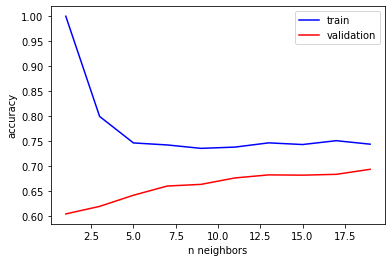

In [69]:
k_values = list(range(1, 20, 2))
train_scores = []
validation_scores = []

for k in k_values:
    
    # Instantiate
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit
    knn.fit(X_train_knn, y_train_knn)
    
    # Evaluate
    train_scores.append(knn.score(X_train_knn, y_train_knn))
    validation_scores.append(knn.score(X_validation_knn, y_validation_knn))

# Visualize
plt.figure()
plt.plot(k_values, train_scores, c='blue', label='train')
plt.plot(k_values, validation_scores, c='red', label='validation')
plt.xlabel('n neighbors')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
# Refit our KNN with k=17
final_knn = KNeighborsClassifier(n_neighbors=17)
final_knn.fit(X_remainder, y_remainder)

### E. Issue with Splitting Train/Validation sets after Performing Vectorization

The issue with splitting the data into train and validation sets after performing vectorization is that if a dataset vectorized and is then split into training/validation sets, these sets will not be representative of the overall distribution of data.

## 3. Employing a Decision Tree Classifier on Dataset

### A. Fitting a Decision Tree Model

Here we will employ a Decision Tree classifier on our dataset. Given that regardless of whether we use our unscaled or scaled data, we know that the decision tree model performance wont be affected by scaling. This is because it splits on each feature independently and so the relative scale between features is irrelevant. Hence, we will continue with our trend and again use our scaled data. First we will instatiate, fit, and evaluate our decision tree model meanwhile plotting it in order to get a a better visual understanding of what is happening.

In [82]:
# Instantiate
DT_model = DecisionTreeClassifier()

# Fit
DT_model.fit(X_train_ss, y_train)

print(f"The TRAIN classification accuracy is:  {DT_model.score(X_train_ss,y_train)}")
print(f"The TEST classification accuracy is:  {DT_model.score(X_test_ss,y_test)}")

The TRAIN classification accuracy is:  1.0
The TEST classification accuracy is:  0.6990860089055543


Looking at the train and test accuracy scores, it is obvious that this is a sign of overfitting. Our train set accuracy is at a perfect score of 1.0 or 100% while our test set accuracy is 0.699 or 69.9%. As we know, decision trees can be quite prone to overfitting. One way to mitigate this is by using a technique called "pre-pruning". We can set limits for how deep decision trees can become during the fitting stage. There is a pre-pruning technique we will use in order to control this. We will explore this below by using the `max_depth` technique.

### B. Optimal Value for Maximum Depth of Decision Tree Model

Next we can use the pre-pruning technique known as `max_depth` in order to mitigate the overfitting. But before we do, it would be best to determine the ideal `max_depth` value. This can be done by creating a loop through a range of different `max_depth` values as shown below.

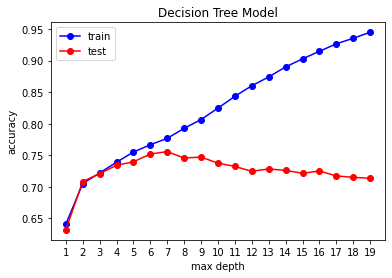

In [83]:
# Create lists to hold our accuracies
train_accs = []
test_accs = []

# Set depth range
depth_range = range(1, 20)

for d in depth_range:
    
    # Instantiate a DT
    my_tree = DecisionTreeClassifier(max_depth=d)
    
    # Fit
    my_tree.fit(X_train_ss, y_train)
    
    # Evaluate on train & test sets
    train_accs.append(my_tree.score(X_train_ss, y_train))
    test_accs.append(my_tree.score(X_test_ss, y_test))

# Plot the results
plt.figure()
plt.plot(depth_range,train_accs, c='blue', label='train', marker="o")
plt.plot(depth_range,test_accs, c='red', label='test', marker="o")
plt.title('Decision Tree Model')
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.xticks(depth_range)
plt.legend()
plt.show()

As we see in the above plot, we have a very nice representation of where our ideal max depth is for our DT model. Although one can argue that the ideal max depth is at `max_depth` = 7 as our test set accuracy drops from that point onward. I would argue that I would choose a `max_depth` = 9 because while our test set accuracy may be just slightly lower than at `max_depth` = 7, our train set accuracy is higher. Also, we can see our test accuracy slowly and continually dropping after `max_depth` = 9.

We can now take a look at what our exact train and test set accuracies are at `max_depth` = 9 and even do the same for `max_depth` =7 just out of curiosity and for comparison.

In [80]:
# Instantiate a DT with 'max_depth' of 7
my_tree_s = DecisionTreeClassifier(max_depth=7)
    
# Fit
my_tree_s.fit(X_train_ss, y_train)

# Evaluate on train & test sets
my_tree_s.score(X_train_ss, y_train)
my_tree_s.score(X_test_ss, y_test)

# To show our train and test accuracy scores
print(f"DT training set accuracy: {my_tree_s.score(X_train_ss, y_train)}")
print(f"DT testing set accuracy: {my_tree_s.score(X_test_ss, y_test)}")

DT training set accuracy: 0.7767619940615721
DT testing set accuracy: 0.7562690414811343


In [81]:
# Instantiate a DT with 'max_depth' of 9
my_tree_n = DecisionTreeClassifier(max_depth=9)
    
# Fit
my_tree_n.fit(X_train_ss, y_train)

# Evaluate on train & test sets
my_tree_n.score(X_train_ss, y_train)
my_tree_n.score(X_test_ss, y_test)

# To show our train and test accuracy scores
print(f"DT training set accuracy: {my_tree_n.score(X_train_ss, y_train)}")
print(f"DT testing set accuracy: {my_tree_n.score(X_test_ss, y_test)}")

DT training set accuracy: 0.8066104078762306
DT testing set accuracy: 0.7454886337004921


We can see that for `max_depth` of 7 and `max_depth` of 9 we have the following train and test set accuracies:

`max_depth` = 7:

- DT training set accuracy: 0.776 (77.6%)
- DT testing set accuracy: 0.756 (75.6%)

`max_depth` = 9:

- DT training set accuracy: 0.806 (80.6%)
- DT testing set accuracy: 0.745 (74.5%)

As shown, I stand by my decision of arguing for a `max_depth` of 9 as it appears to have the ideal train and test set accuracy scores. The train set accuracy is about 3% higher than that of `max_depth` of 7 while having a test set accuracy score thats smaller by only about 1%.

From the above visualization, we can see that the optimal value for the maximum depth of the decision tree is 5. This is because after max depth of 5, our test set accuracy begins to decline.

### C. Advantages of Decision Trees over KNN and Weaknesses of Decision Trees

Some of the advantages of Decision Trees over KNN are as follows:

- DT is a supervised model while KNN is unsupervised.
- DT is better for classification, as KNN is used more commonly for clustering. 
- DT attributes may be numeric or nominal, while KNN must be numeric.

Some weaknesses of Decision Trees is as follows:

- You can easily overfit (as seen above where we got an accuracy score of 1.0).
- They are unstable and often relatively inaccurate. 

## 4. Purpose of Validation Set

Whenever we build a model, we need to validate to estimate its accuracy and how well the model is performing. Hence the puspose of a validation set which is used to tune a model's hyperparameters. The validation set also serves as somewhat of an unbiased estimate of the model's performance. Since we do not fit the model on this data it should not overfit when using the fit parameter to it. But since we are adjusting the hyperparameters on this set we still implicitly overfit to it.

The validation set is differs from the test set in that the test set is used to provide a completely unbiased estimate of our model's performance. This is data our model has never seen and therefore it serves as a good predictor for our model's performance once deployed and making prediction on new data.

## 5. Re-running Logistic Regression on Data

### A. Performing a 5-fold Cross Validation to Optimize Hyperparameters

In order to perform a 5 fold cross validation to optimize the hyperparameters of our model, we first need to partition the data into different K groups in which this case K = 5. Next we evaluate our models by looking at the average over all 5 of the validation sets. To do this we will use our original train and test data, leaving our test data aside to use for assessing the final model's performance. The remainder of the data (our original train set) will be split into a training and validation set, in 5 different ways. Once we have these 5 different train and validation sets, we will fit a Logistic Regression model to each training set and score it on the validation for each split, resulting in 5 scores. The average of all scores which will be taken as the final evaluation of the model on the validation data.

In [96]:
# Splitting the data 5-fold cross validation.
X_remainder_ff, X_validation_ff, y_remainder_ff, y_validation_ff = train_test_split(X_train, y_train, test_size = 0.2, random_state=1)

In [97]:
# Instanitate model
my_logreg_ff = LogisticRegression(random_state=1)

# Fit model on 5 folds
scores = cross_val_score(my_logreg_ff, X_remainder_ff, y_remainder_ff, cv = 5)

# Show results
print(scores)

[0.73535156 0.71289062 0.72851562 0.72936004 0.74255007]


In [98]:
# Each score above corresponds to a fold
for i in range(len(scores)) :
    print(f"Fold {i+1}: {scores[i]}")

Fold 1: 0.7353515625
Fold 2: 0.712890625
Fold 3: 0.728515625
Fold 4: 0.7293600390815828
Fold 5: 0.7425500732779677


As shown above, we were able to determine the score of each of the 5 validation sets. Now to find the average score over the 5 folds we can compute the following:

In [99]:
# Compute average score across 5 folds
print(f"Average Score:{np.mean(scores)}")

Average Score:0.7297335849719101


The average score across the 5 folds is 0.729 or 72.9%. This is the average of all scores that is taken as the final evaluation of the model on our validation data.

Using the information we just attained in regards to our 5 fold average score, we can now use cross validation for model selection and hyperparameter optimization. In order to do this we must first evaluate all model results from changing hyperparameter values that we are considering on each of the folds. Once we visualize this, we can make the choice of optimal hyperparameter value by looking at the highest cross validation score.

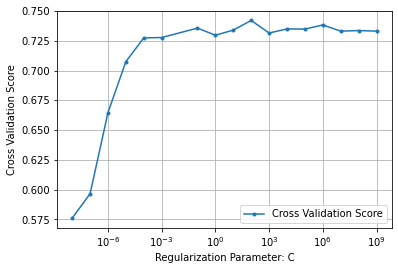

The best model has C =  100.0


In [100]:
#Store the results
cross_validation_scores = []

C_range = np.array([.00000001,.0000001,.000001,.00001,.0001,.001,.1,\
                1,10,100,1000,10000,100000,1000000,10000000,100000000,1000000000])

# To do some cross validation
for c in C_range:
    LR_model = LogisticRegression(C=c, random_state=1)
    
    # the cross validation score (mean of scores from all folds)
    # fit the LR_model 5-fold and score the different validation sets
    cv_score = np.mean(cross_val_score(LR_model, X_remainder_ff, y_remainder_ff, cv = 5))
    
    cross_validation_scores.append(cv_score)

# Visualize
plt.figure()
plt.plot(C_range, cross_validation_scores,label="Cross Validation Score",marker='.')
plt.legend()
plt.xscale("log")
plt.xlabel('Regularization Parameter: C')
plt.ylabel('Cross Validation Score')
plt.grid()
plt.show();

which_max = np.array(cross_validation_scores).argmax()

print("The best model has C = ",C_range[which_max])

Now that we have our optimal C value which is 100, now we can run this again and look for the best C-parameter value using our K = 100-fold cross validation.

In [101]:
# Rerunning above using 0.001-fold cross validation

cross_validation_scores = []

C_range = np.array([.00000001,.0000001,.000001,.00001,.0001,.001,.1,\
                1,10,100,1000,10000,100000,1000000,10000000,100000000,1000000000])

#Do some cross validation
for c in C_range:
    LR_model = LogisticRegression(C=c,random_state=1)
    cv_score = np.mean(cross_val_score(LR_model, X_remainder_ff, y_remainder_ff, cv = 100))
    cross_validation_scores.append(cv_score)

plt.figure()
plt.plot(C_range, cross_validation_scores,label="Cross Validation Score",marker='.')
plt.legend()
plt.xscale("log")
plt.xlabel('Regularization Parameter: C')
plt.ylabel('Cross Validation Score')
plt.grid()
plt.show();

which_max = np.array(cross_validation_scores).argmax()

print("The best model has C = ",C_range[which_max])

KeyboardInterrupt: 

The whole point of this cross validation was to avoid variations in our model brought about by different training/validation splits. This is exactly the result we got which shows we have conducted our 5-fold cross validation to optimize hyperparameters with great success.

### B. Confusion Matrix

In [102]:
#Lets build a Logistic Regression

# Instantiate the model
my_log_ma = LogisticRegression(solver='lbfgs')

# Fit the model
my_log_ma = my_log_ss.fit(X_remainder_ff, y_remainder_ff)

#Predict/Score
train_score_log_ma = my_log_ma.score(X_remainder_ff, y_remainder_ff)
test_score_log_ma = my_log_ma.score(X_validation_ff, y_validation_ff)

In [109]:
print(f'train accuracy:  {train_score_log_ma:.5f}')
print(f'test accuracy:  {test_score_log_ma:.5f}', '\n')

train accuracy:  0.72622
test accuracy:  0.72344 



As we can see above, we got a train set accuracy of 0.726 or 72.6% and a test set accuracy of 0.723 or 72.3%.

We can take a further look at our accuracy:

In [105]:
y_pred = my_log_ma.predict(X_validation_ff)

# True values first, predicted values second
confusion_matrix(y_validation_ff, y_pred)

array([[ 600,  497],
       [ 211, 1252]], dtype=int64)

In [106]:
np.unique(y_validation_ff, return_counts=True)

(array([0, 1], dtype=int64), array([1097, 1463], dtype=int64))

The numbers from the above confusion matrix are as follows:

|   .  |  Predicted Negative Reviews  |   Predicted Positive Reviews | 
| --------- |:---:|:---:|
|True Negative Reviews |600 | 498 | 
|True Positive Reviews |211 |1252 | 

If we were to interpret these numbers, wer can show this with the following:
* **TN**: There were 600 Negative Reviews that we correctly classified as Negative Reviews
* **FP**: There were 498 Positive Reviews that we incorrectly classified as Negative Reviews
* **FN**: There were 211 Negative Reviews that we incorrectly classified as Positive Reviews
* **TP**: There were 1252 Positive Reviews that we correctly classified as Positive Reviews